In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# sales = '/content/drive/MyDrive/supermarket_sales1.csv'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [9]:
sales_data= pd.read_csv('supermarket_sales1.csv')

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

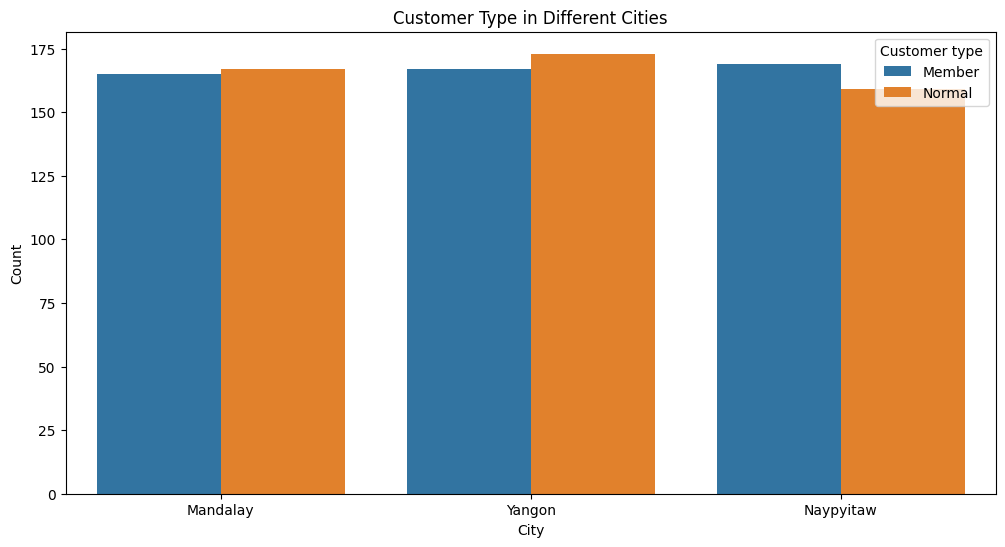

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', hue='Customer type', data=sales_data)
plt.title('Customer Type in Different Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

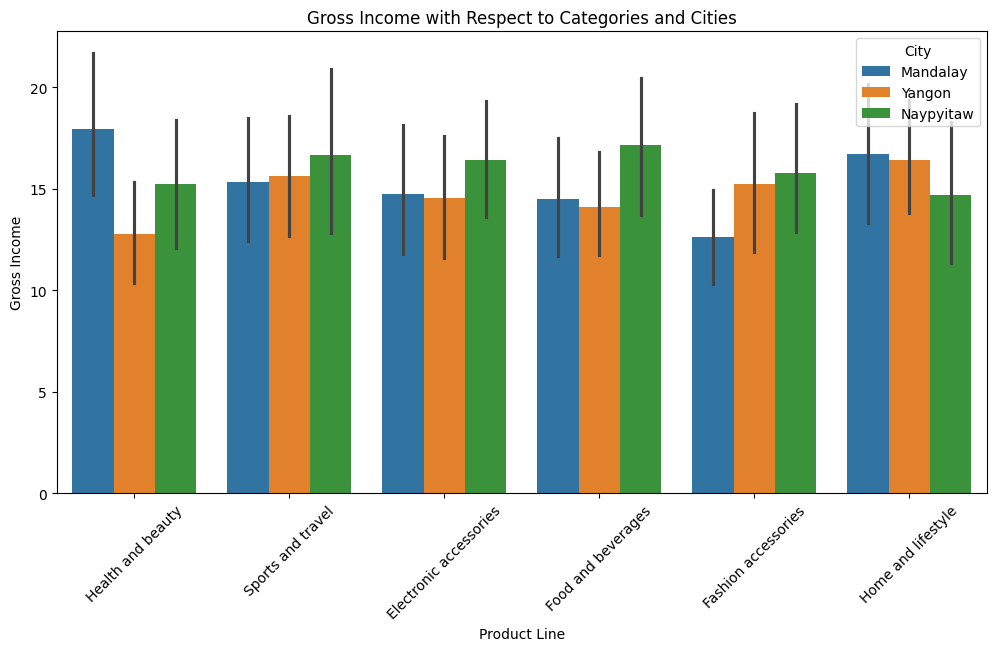

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='gross income', hue='City', data=sales_data)
plt.title('Gross Income with Respect to Categories and Cities')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper right')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11120\2411440204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_data.corr()


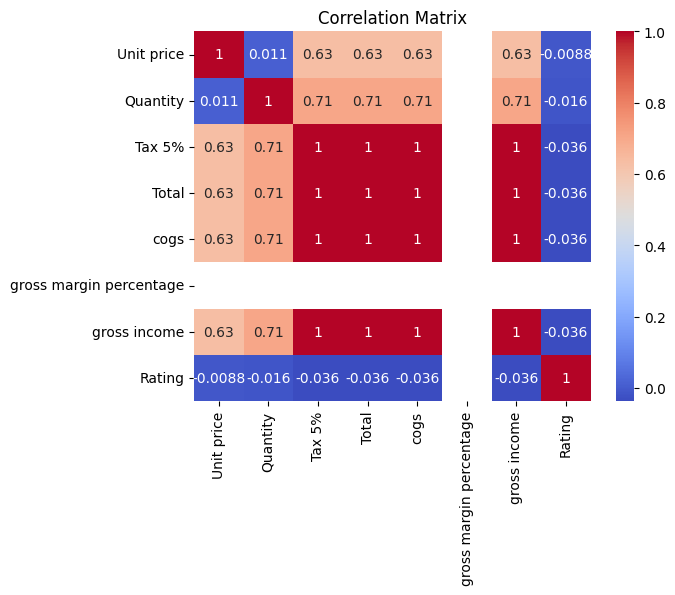

In [13]:
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

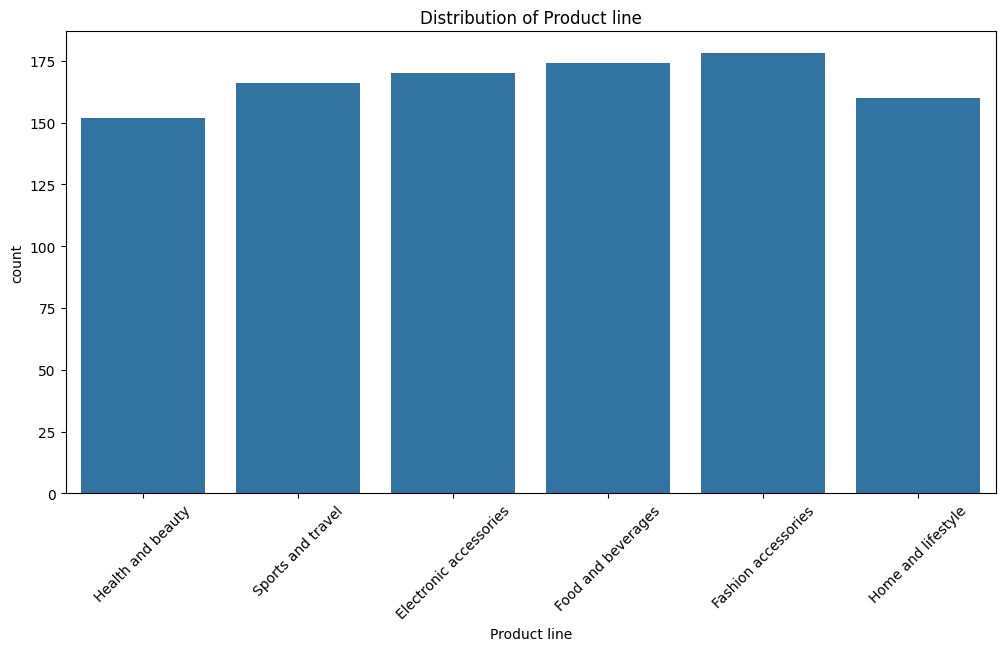

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', data=sales_data)
plt.title('Distribution of Product line')
plt.xticks(rotation=45)
plt.show()

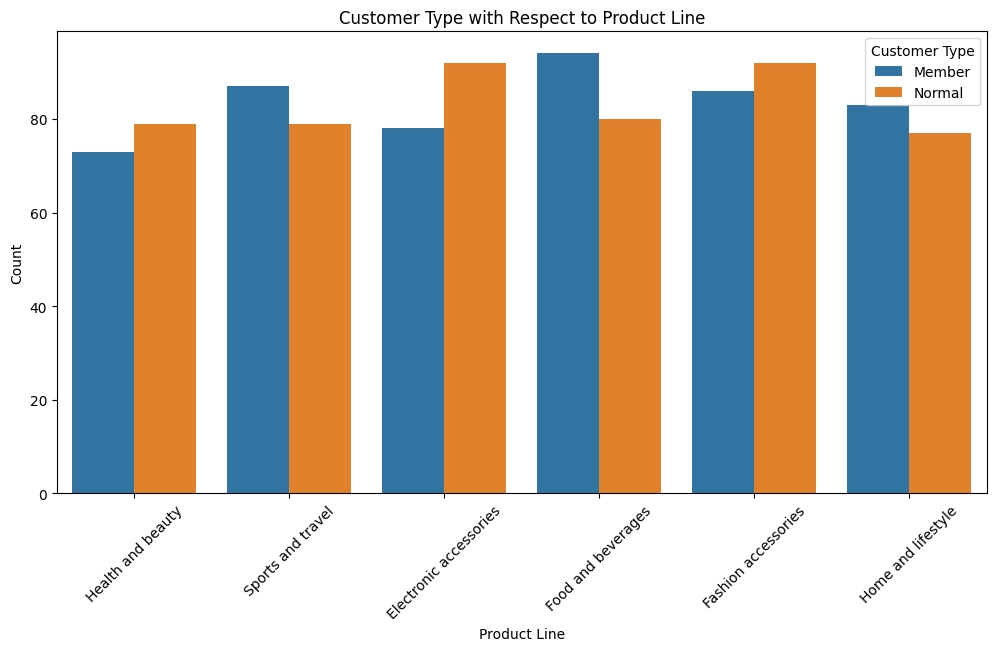

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', hue='Customer type', data=sales_data)
plt.title('Customer Type with Respect to Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Type', loc='upper right')
plt.show()

In [16]:
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [17]:
sales_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
sales_data['Total']

0      918.7290
1      295.6905
2      609.5880
3      338.3100
4      609.1680
         ...   
995    113.5680
996    779.3100
997    184.0860
998    177.4080
999    888.6150
Name: Total, Length: 1000, dtype: float64

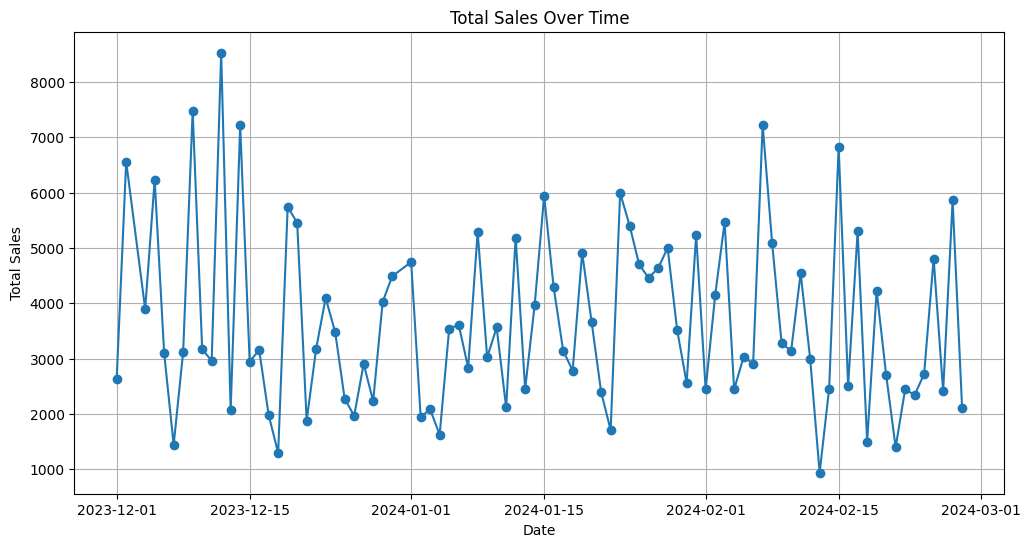

In [19]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Group the data by date and calculate the total sales for each date
daily_sales = sales_data.groupby('Date')['Total'].sum().reset_index()

# Plot the total sales against the date
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

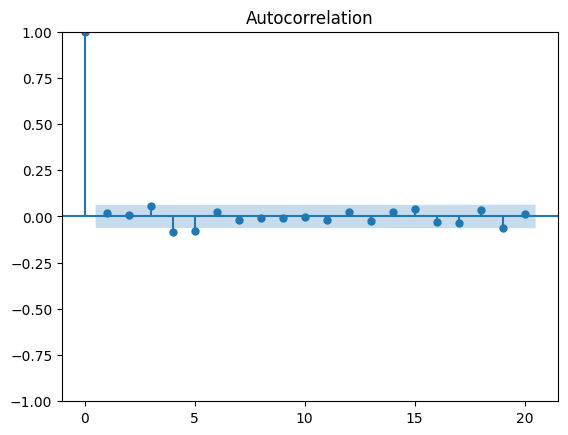

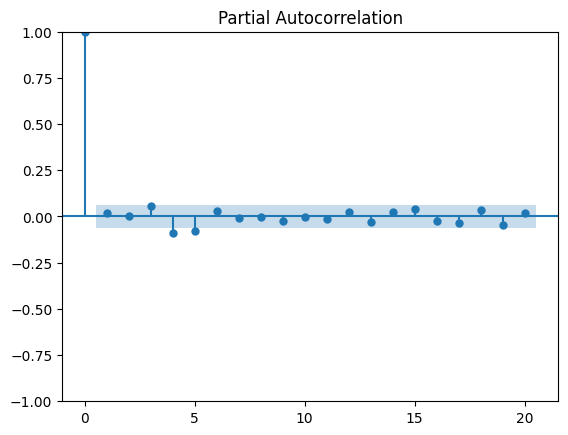

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


# Plot ACF
plot_acf(sales_data['Total'], lags=20)
plt.show()

# Plot PACF
plot_pacf(sales_data['Total'], lags=20)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


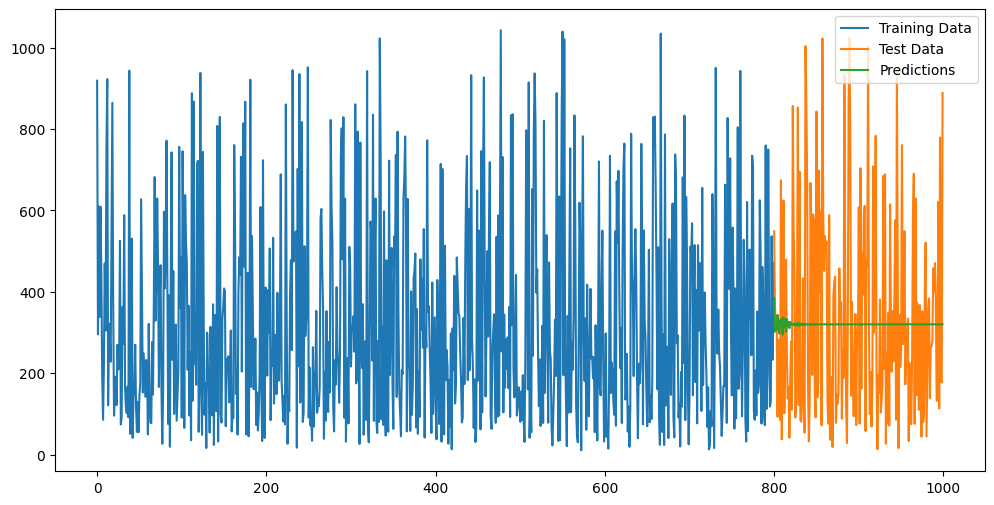

In [21]:
train_size = int(len(sales_data) * 0.8)  # 80% training, 20% testing
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

# Define the SARIMA model
order = (4, 1, 5)  # Non-seasonal order
seasonal_order = (0, 0, 0, 12)  # Seasonal order

# Fit the SARIMA model on the training data
model = SARIMAX(train_data['Total'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast the values on the test data
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start, end=end, typ='levels')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Total'], label='Training Data')
plt.plot(test_data.index, test_data['Total'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                 1000
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -6912.731
Date:                Tue, 26 Mar 2024   AIC                          13845.461
Time:                        17:06:47   BIC                          13894.529
Sample:                             0   HQIC                         13864.111
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5680      0.138    -11.355      0.000      -1.839      -1.297
ar.L2         -1.6968      0.195     -8.695      0.000      -2.079      -1.314
ar.L3         -1.3046      0.192     -6.779      0.0

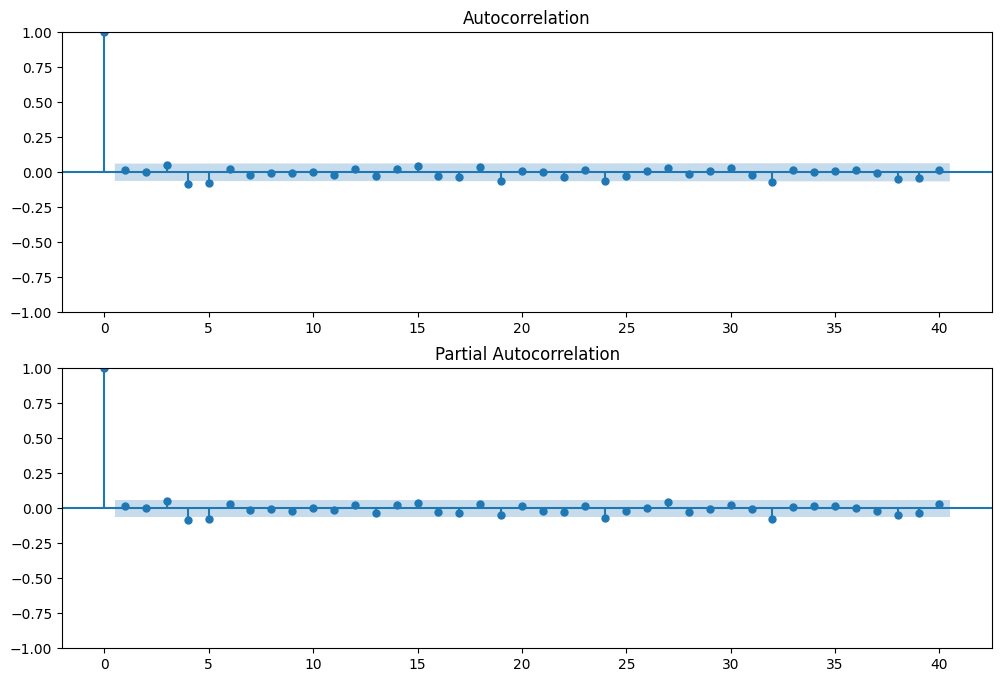

In [22]:
order = (4, 1, 5)  # Non-seasonal order
seasonal_order = (0, 0, 0, 12)  # Seasonal order

# Fit the SARIMA model
model1 = SARIMAX(sales_data['Total'], order=order, seasonal_order=seasonal_order)
results = model1.fit()

# Print the model summary
print(results.summary())

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(sales_data['Total'], lags=40, ax=ax[0])
plot_pacf(sales_data['Total'], lags=40, ax=ax[1])
plt.show()


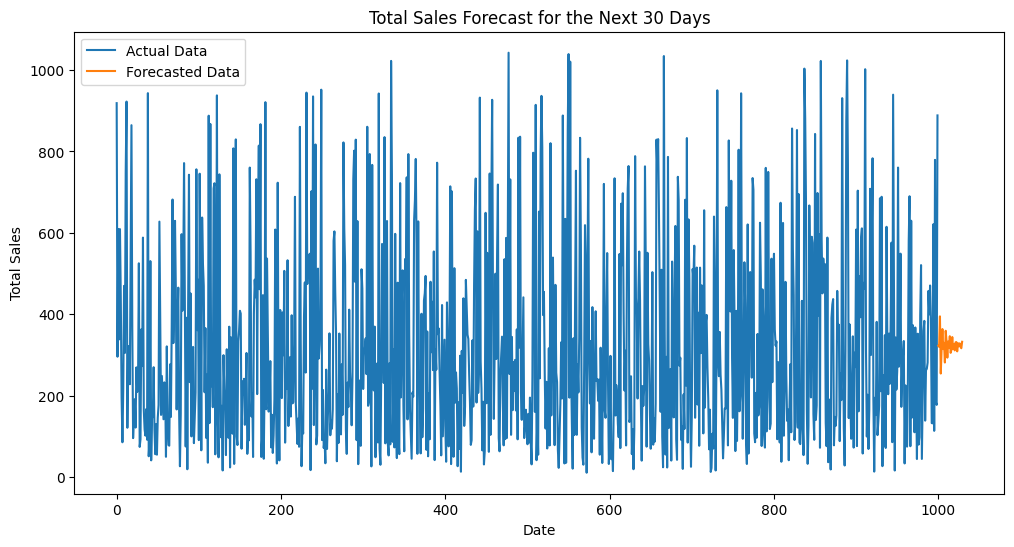

1000    322.888317
1001    320.013444
1002    394.860967
1003    254.411273
1004    313.319061
1005    363.679756
1006    314.463761
1007    329.769320
1008    281.453058
1009    359.436099
1010    334.370605
1011    293.437763
1012    332.967607
1013    317.373260
1014    346.076627
1015    305.231493
1016    312.647793
1017    344.031651
1018    314.997619
1019    326.804357
1020    311.309654
1021    331.006132
1022    331.773726
1023    308.919647
1024    328.837085
1025    321.298901
1026    328.589140
1027    320.308083
1028    316.513350
1029    332.395003
Name: predicted_mean, dtype: float64


In [23]:
# Forecast the next 30 days
forecast = results.get_forecast(steps=30)

# Get the forecasted values
forecast_values = forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Total'], label='Actual Data')
plt.plot(forecast_values.index, forecast_values, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Forecast for the Next 30 Days')
plt.legend()
plt.show()

print(forecast_values)

In [24]:
date_range = pd.date_range(start='2024-03-01', periods=30)

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': date_range, 'Forecasted Sales': forecast_values.values})

# Save the DataFrame to a CSV file
forecast_df.to_csv('sales_forecast.csv', index=False)